VIDISHA SHARMA

AIML B3

22070126131

## INTRODUCTION

Data forms the foundation of any machine learning algorithm, without it, Data Science can not happen. Sometimes, it can contain a huge number of features, some of which are not even required. Such redundant information makes modeling complicated. Furthermore, interpreting and understanding the data by visualization gets difficult because of the high dimensionality. This is where dimensionality reduction comes into play.

##WHAT IS DIMENSIONALITY REDUCTION
Dimensionality reduction is the task of reducing the number of features in a dataset. In machine learning tasks like regression or classification, there are often too many variables to work with. These variables are also called features. The higher the number of features, the more difficult it is to model them, this is known as the curse of dimensionality.

Additionally, some of these features can be quite redundant, adding noise to the dataset and it makes no sense to have them in the training data. This is where feature space needs to be reduced.

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


BASIC INFORMATION ABOUT THE DATASET


In [28]:
df=pd.read_csv(r"C:\Users\Sejal\Downloads\new\dimesionality_redn.csv")

## DATASET DESCRIPTION

tracking_id: This column likely serves as a unique identifier for each observation or data point in your dataset. It's useful for tracking and referencing individual records but doesn't typically contain information relevant to analysis.

datetime: This column likely represents the timestamp or date and time associated with each observation. It can be useful for time-series analysis, detecting trends or patterns over time.

wind_speed(m/s): This column likely represents the speed of the wind measured in meters per second at the location of the windmill.

atmospheric_temperature(°C): This column likely represents the atmospheric temperature in degrees Celsius at the location of the windmill.

shaft_temperature(°C): This column likely represents the temperature of the shaft of the windmill in degrees Celsius.

blades_angle(°): This column likely represents the angle of the windmill blades in degrees.

gearbox_temperature(°C): This column likely represents the temperature of the gearbox of the windmill in degrees Celsius.

engine_temperature(°C): This column likely represents the temperature of the engine of the windmill in degrees Celsius.
motor_torque(N-m): This column likely represents the torque exerted by the motor of the windmill, measured in Newton-meters.

generator_temperature(°C): This column likely represents the temperature of the generator of the windmill in degrees Celsius.

atmospheric_pressure(Pascal): This column likely represents the atmospheric pressure measured in Pascals at the location of the windmill.

area_temperature(°C): This column likely represents the temperature of the surrounding area where the windmill is located in degrees Celsius.

windmill_body_temperature(°C): This column likely represents the temperature of the body or structure of the windmill itself in degrees Celsius.

wind_direction(°): This column likely represents the direction of the wind measured in degrees.

resistance(ohm): This column likely represents the electrical resistance measured in ohms in the windmill system.

rotor_torque(N-m): This column likely represents the torque exerted on the rotor of the windmill, measured in Newton-meters.

turbine_status: This column likely represents the status or condition of the wind turbine, which could include operational states or error codes.

cloud_level: This column likely represents the level or density of clouds in the atmosphere at the location of the windmill.

blade_length(m): This column likely represents the length of the windmill blades measured in meters.

blade_breadth(m): This column likely represents the breadth or width of the windmill blades measured in meters.

windmill_height(m): This column likely represents the height of the windmill structure measured in meters.

windmill_generated_power(kW/h): This column likely represents the power generated by the windmill, measured in kilowatts per hour. This is likely the target variable you're interested in predicting or analyzing.

In [30]:
print("Top 5 entries of the datset are: ")
df.head()

Top 5 entries of the datset are: 


,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,04-08-2019 14:33,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,05-11-2018 10:13,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,14-09-2019 14:03,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,25-12-2018 15:33,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,04-05-2019 03:13,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [32]:
print("Shape of the datset is: ")
df.shape

Shape of the datset is: 


(28200, 22)

In [7]:
print("Dataset Description:")
print(df.info())

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_bo

In [33]:
df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

HANDLING MISSING VALUES

In [34]:
# Impute missing values for numerical columns using median
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [35]:
# Impute missing values for categorical columns using mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(method='ffill')

C:\Users\Sejal\AppData\Local\Temp\ipykernel_12372\1416888224.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[categorical_cols] = df[categorical_cols].fillna(method='ffill')


Since 'tracking_id' is categorical, we can encode it into numerical values using techniques like Label Encoding or One-Hot Encoding.

Let's use One-Hot Encoding for this purpose:

In [26]:
# One-Hot Encoding for 'tracking_id'
df = pd.get_dummies(df, columns=['tracking_id'], drop_first=True)

KeyError: "None of [Index(['tracking_id'], dtype='object')] are in the [columns]"

For 'datetime', we can extract useful features such as year, month, day, hour, minute, etc., which might be relevant for our model. We can then use these features instead of the original 'datetime' column.

In [27]:
# Convert 'datetime' column to datetime type with specified format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')
# Extract useful features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
# Drop the original 'datetime' column
df.drop('datetime', axis=1, inplace=True)


KeyError: 'datetime'

In [36]:
df.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

In [14]:
df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,tracking_id_WM_9992,tracking_id_WM_9993,tracking_id_WM_9995,tracking_id_WM_9997,tracking_id_WM_9998,year,month,day,hour,minute
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.96190,26.897875,...,False,False,False,False,False,2019,8,4,14,33
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.90408,39.801469,...,False,False,False,False,False,2018,11,5,10,13
2,95.484724,16.102410,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.92711,36.116065,...,False,False,False,False,False,2019,9,14,14,3
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.73234,46.020045,...,False,False,False,False,False,2018,12,25,15,33
4,10.722890,16.102410,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.16900,34.572941,...,False,False,False,False,False,2019,5,4,3,13


HANDLING CATEGORICAL VALUES

In [40]:
label_encoder = LabelEncoder()
df['turbine_status'] = label_encoder.fit_transform(df['turbine_status'])
df['cloud_level'] = label_encoder.fit_transform(df['cloud_level'])

EXPPLORATORY DATA ANALYSIS

 EDA employs visual techniques to represent the statistics graphically. Visualizations consisting of histograms, box plots, scatter plots, line plots, heatmaps, and bar charts assist in identifying styles, trends, and relationships within the facts.

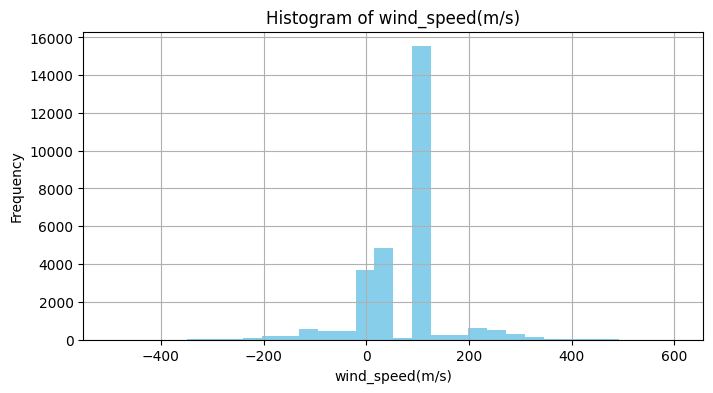

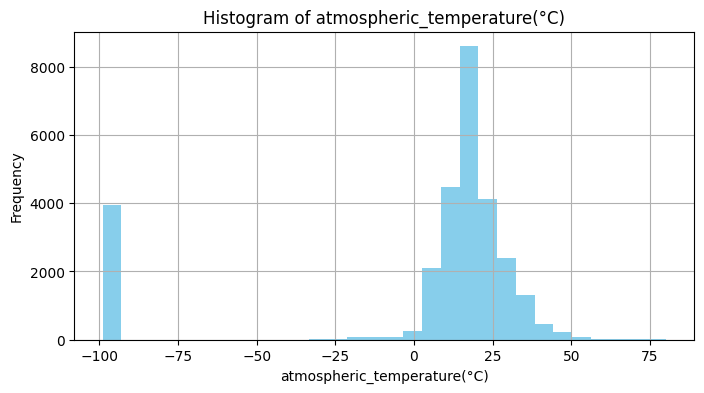

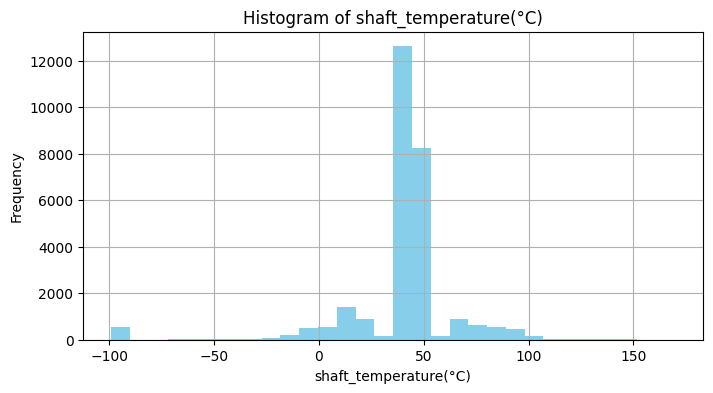

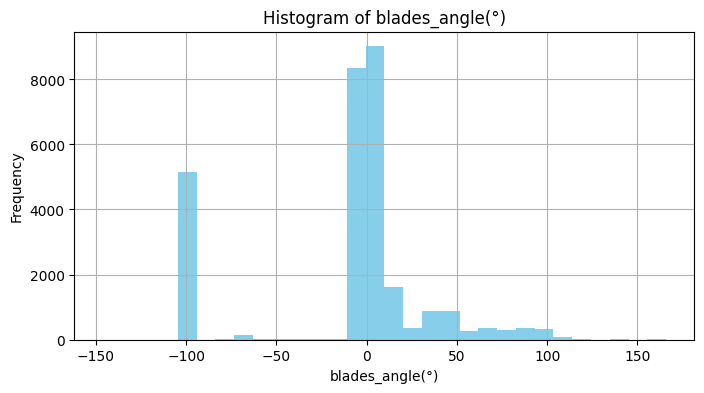

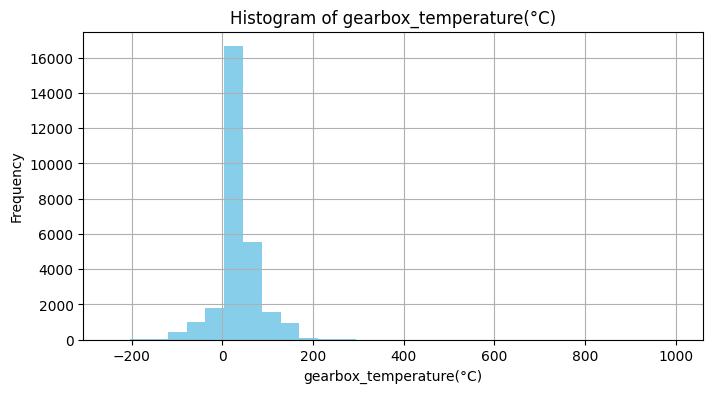

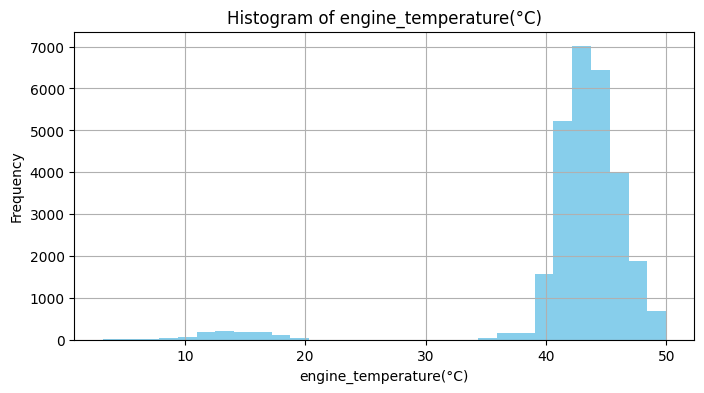

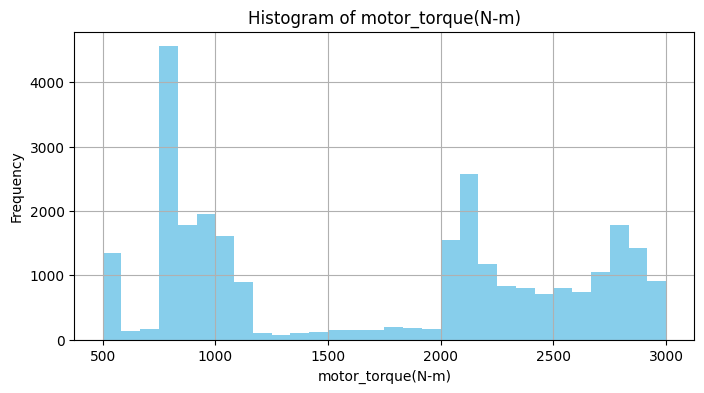

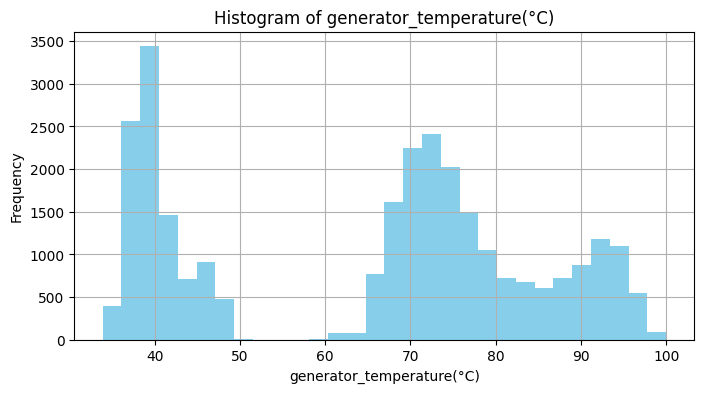

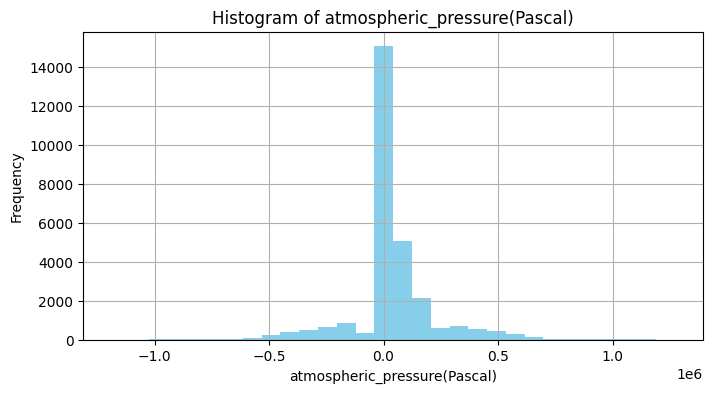

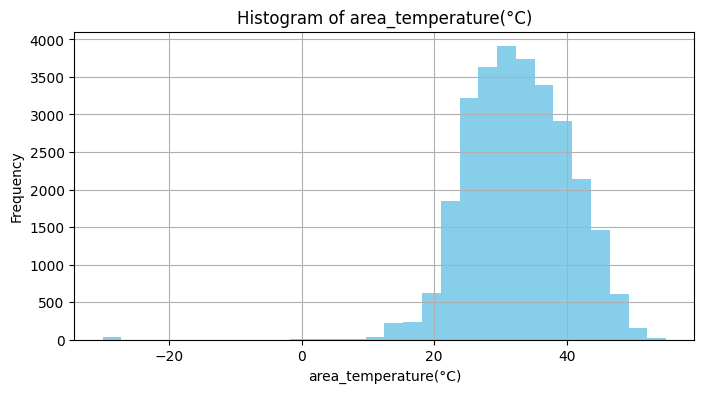

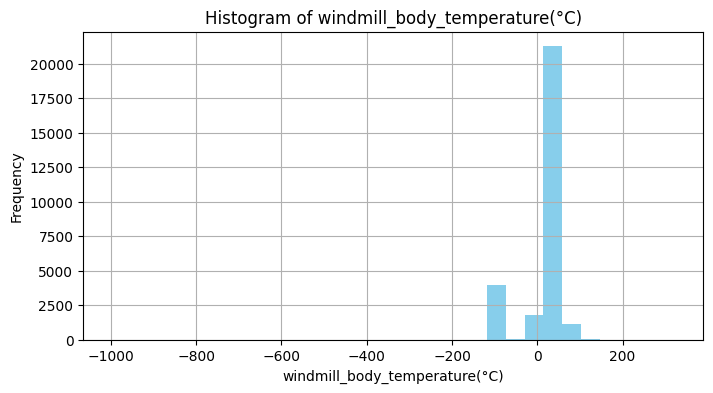

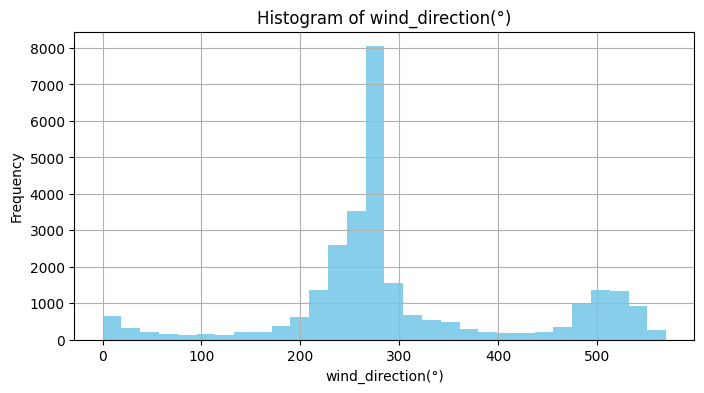

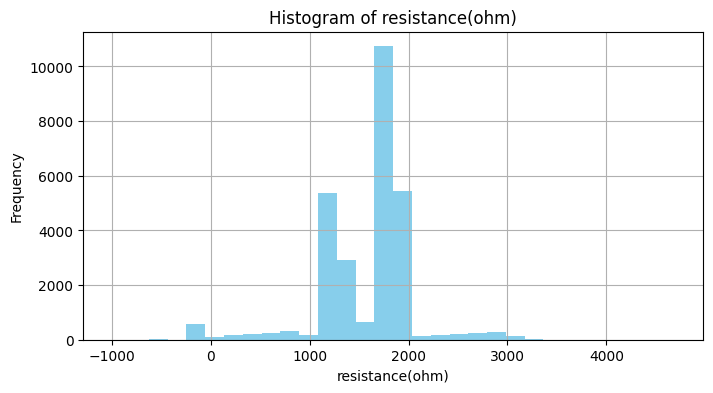

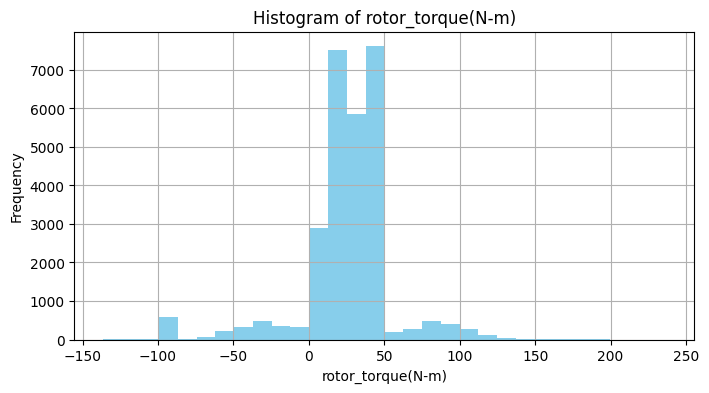

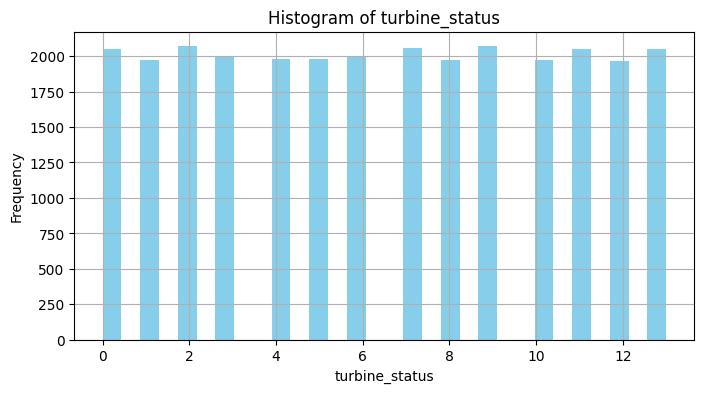

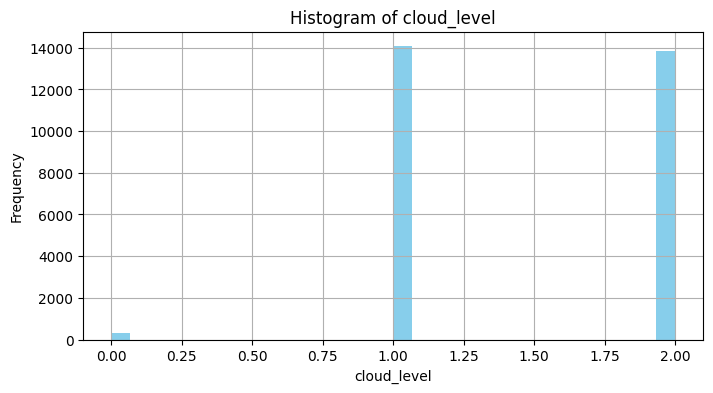

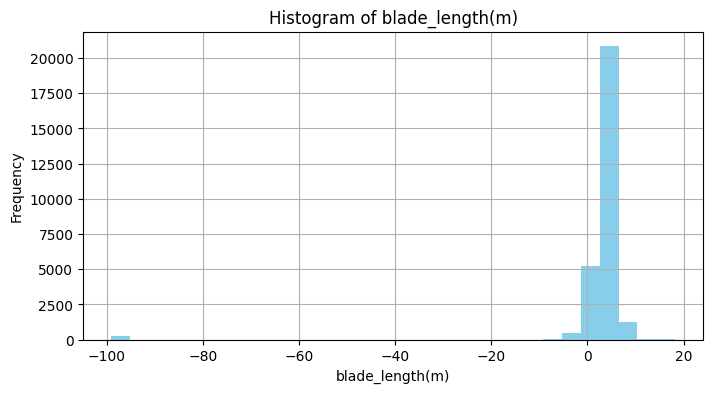

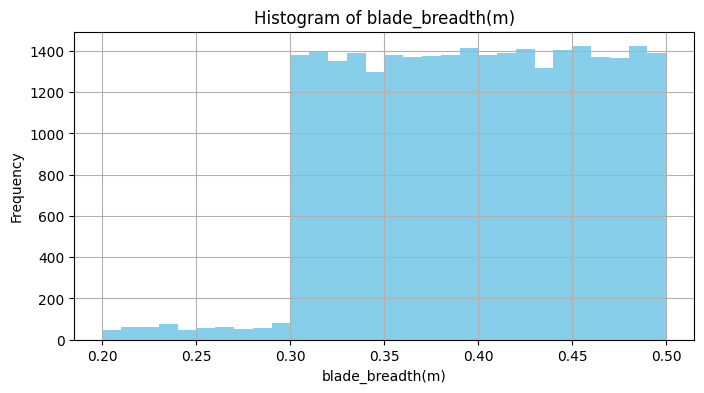

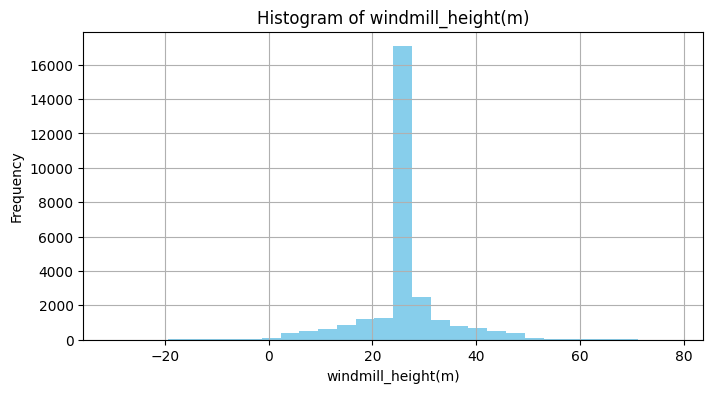

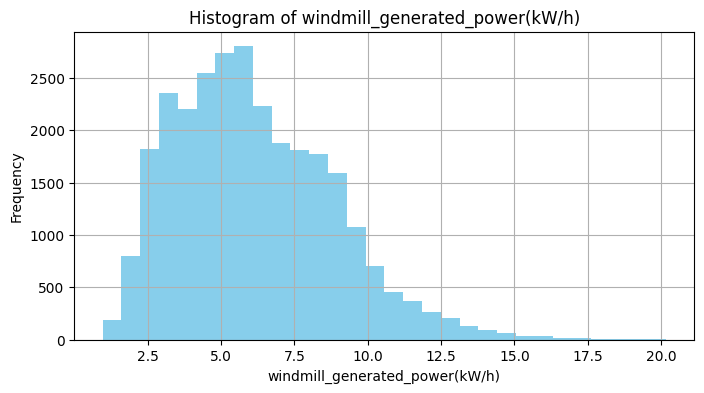

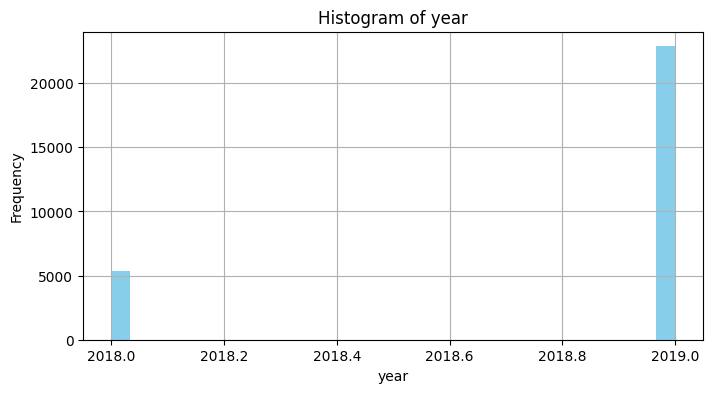

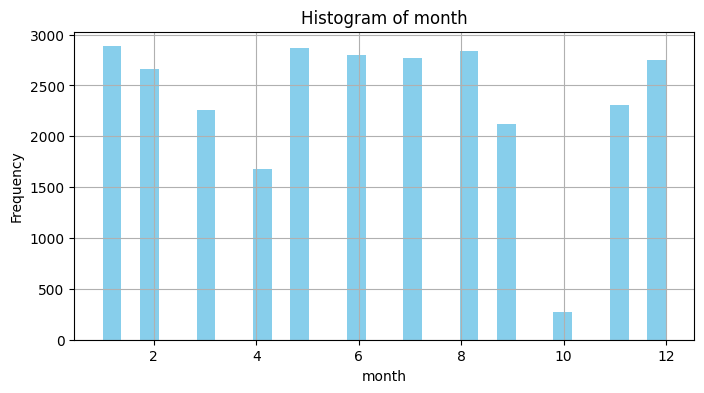

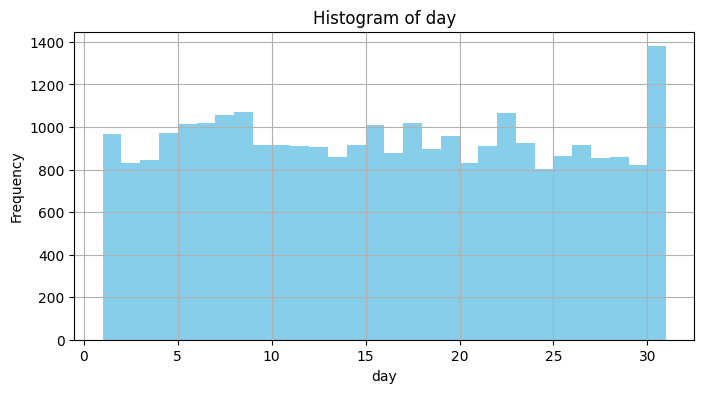

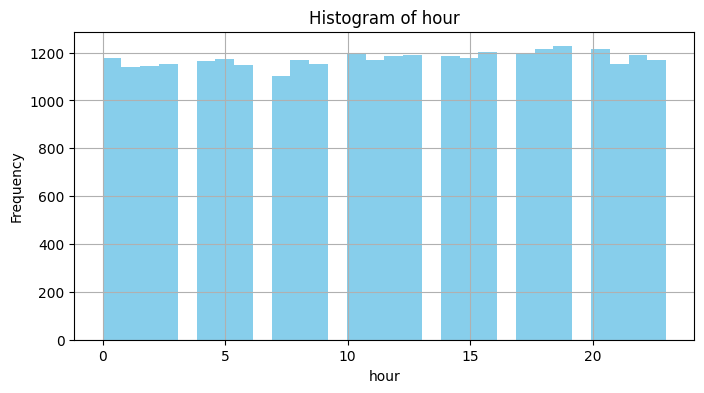

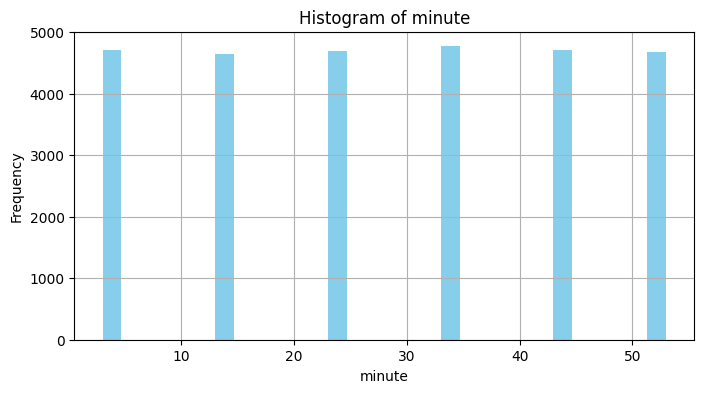

In [16]:
# Plot histograms of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(df[feature], bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Text(0.5, 1.0, 'Windmill Power Vs Wind Speed')

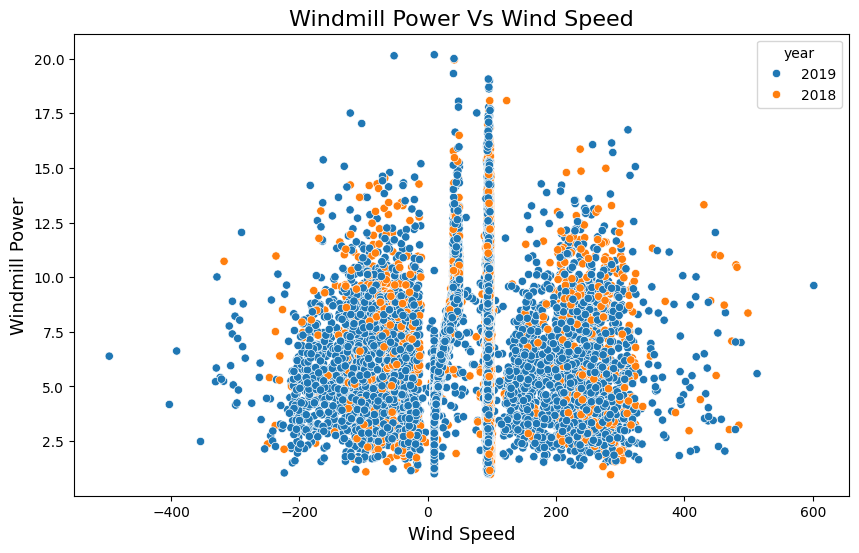

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed(m/s)',y='windmill_generated_power(kW/h)',data=df.iloc[:28200,:].astype({'year':str}),hue='year')
plt.xlabel('Wind Speed',fontsize=13)
plt.ylabel('Windmill Power',fontsize=13)
plt.title('Windmill Power Vs Wind Speed',fontsize=16)



# PRINCIPAL COMPONENT ANALYSIS
It is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
The idea of PCA is simple: reduce the number of variables of a data set, while preserving as much information as possible.

# HOW DOES PCA WORK?
### Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.


### Step 2: Covariance Matrix Computation

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.


### Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

These are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.


### Step 4: Create a Feature Vector

In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep




### Step 5: Recast the Data Along the Principal Components Axes

 In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis).

        

In [42]:
df.head

<bound method NDFrame.head of       tracking_id          datetime  wind_speed(m/s)  \
0        WM_33725  04-08-2019 14:33        94.820023   
1          WM_698  05-11-2018 10:13       241.832734   
2        WM_39146  14-09-2019 14:03        95.484724   
3         WM_6757  25-12-2018 15:33       238.819424   
4        WM_21521  04-05-2019 03:13        10.722890   
...           ...               ...              ...   
28195     WM_7814  02-01-2019 02:43        94.765699   
28196    WM_32512  26-07-2019 12:53        94.196738   
28197     WM_5193  12-12-2018 02:13        94.160463   
28198    WM_12173  03-02-2019 19:13        95.430377   
28199    WM_33004  30-07-2019 11:43        43.558352   

       atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                       -99.000000              41.723019        -0.903423   
1                        27.764785             -99.000000       -99.000000   
2                        16.102410              41.855473      

In [52]:
# Define features and target variable
X = df.drop([ 'windmill_generated_power(kW/h)'], axis=1)
y = df['windmill_generated_power(kW/h)']

In [53]:
# Exclude non-numeric features
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Include only numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

We are creating a function to build and evaluate the models

In [61]:
# Model Building and Evaluation function
def build_and_evaluate_model(X_train, X_test, y_train, y_test, dimensionality_reduction_method):
    # Apply dimensionality reduction
    X_train_reduced = dimensionality_reduction_method.fit_transform(X_train)
    X_test_reduced = dimensionality_reduction_method.transform(X_test)

    # Train a RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test_reduced)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    return mse

Now we will build models with different dimensionality reduction methods and compare performance

In [48]:
# Before dimensionality reduction
print("Before Dimensionality Reduction:")
rf_model_before_reduction = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_before_reduction.fit(X_train, y_train)
y_pred_before_reduction = rf_model_before_reduction.predict(X_test)
mse_before_reduction = mean_squared_error(y_test, y_pred_before_reduction)
print("Mean Squared Error before reduction:", mse_before_reduction)

Before Dimensionality Reduction:
Mean Squared Error before reduction: 0.35236501032890116


In [49]:
# PCA
print("\nUsing PCA:")
pca = PCA(n_components=10)
mse_pca = build_and_evaluate_model(X_train, X_test, y_train, y_test, pca)
print("Mean Squared Error after PCA:", mse_pca)


Using PCA:
Mean Squared Error after PCA: 3.153863261638189


#Conclusion
Before PCA: The MSE value is relatively low (0.35), indicating that the model's predictions are close to the actual values on average. This suggests that the original features might already be capturing much of the variation in the data effectively.
After PCA: The MSE value significantly increased (3.15) compared to before PCA. This suggests that after reducing the dimensionality using PCA, the model's predictive performance decreased. The higher MSE indicates that the model's predictions are less accurate after PCA.

## LINEAR DISCRIMINANT ANALYSIS
Linear Discriminant Analysis (LDA), also known as Normal Discriminant Analysis or Discriminant Function Analysis, is a dimensionality reduction technique primarily utilized in supervised classification problems. It facilitates the modeling of distinctions between groups, effectively separating two or more classes.
Assumptions of LDA
LDA assumes that the data has a Gaussian distribution and that the covariance matrices of the different classes are equal

## HOW DOES LDA WORKS?
LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separates the different classes of data.

LDA aims to maximize the distance between classes while minimizing the variation within each class.
Unlike PCA (Principal Component Analysis), which doesn't take class labels into account, LDA is supervised and uses class information to maximize class separability.

LDA assumes that the features are normally distributed within each class and that the classes have identical covariance matrices

LDA expects the target variable to be categorical or ordinal, but dataset contains continuous numerical values. This mismatch in data type leads to the "Unknown label type" error when attempting to fit the LDA model.

 **Linear Discriminant Analysis (LDA) is not suitable for dataset because it is designed for classification tasks with discrete class labels, whereas dataset involves regression with continuous numerical target values.**

# SINGLE VALUE DECOMPOSITION
The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations

## HOW DOES SVD WORKS?
Decomposition: SVD breaks down a matrix into three simpler matrices: 

Orthogonal Matrices: 
 orthogonal matrices, meaning their columns are perpendicular to each other. This property aids in interpretation and computation.
Singular Values: 
Σ is a diagonal matrix containing singular values, which indicate the importance of each dimension or feature in the data.
Rank Reduction: SVD allows for rank reduction by keeping only the most significant singular values and their associated vectors. This facilitates dimensionality reduction and noise removal.
Data Reconstruction: The original matrix can be approximated by multiplying the three decomposed matrices. The approximation becomes more accurate with more singular values retained.


In [65]:
# SVD
print("\nUsing Truncated SVD:")
svd = TruncatedSVD(n_components=10)
mse_svd = build_and_evaluate_model(X_train, X_test, y_train, y_test, svd)
print("Mean Squared Error after SVD:", mse_svd)


Using Truncated SVD:
Mean Squared Error after SVD: 3.1509284233546517


# conclusion
The Mean Squared Error (MSE) after applying Truncated Singular Value Decomposition (SVD) for dimensionality reduction is 3.1509284233546517,Thus reduced-dimensional representation generated by Truncated SVD may not adequately capture the variance present in the original dataset, leading to suboptimal predictive performance.

In [67]:
# Comparison
print("\nComparison of Dimensionality Reduction Methods:")
print("PCA MSE:", mse_pca)
#print("LDA MSE:", mse_lda)
print("SVD MSE:", mse_svd)


Comparison of Dimensionality Reduction Methods:
PCA MSE: 3.153863261638189
SVD MSE: 3.1509284233546517


# Final Comaprison

#The MSE values obtained after dimensionality reduction using PCA and Truncated SVD are very close to each other. This suggests that both techniques perform similarly in terms of preserving the essential information in the dataset while reducing its dimensionality.

#Based on the comparable MSE values, both PCA and Truncated SVD seem to provide similar levels of performance in terms of dimensionality reduction for the given dataset. However, the choice between PCA and SVD may depend on other factors such as computational efficiency, interpretability, and specific requirements of the application.